Deneme 1: Başarı Oranı: %100.00
Deneme 2: Başarı Oranı: %100.00
Deneme 3: Başarı Oranı: %100.00
Deneme 4: Başarı Oranı: %100.00
Deneme 5: Başarı Oranı: %100.00
Deneme 6: Başarı Oranı: %100.00
Deneme 7: Başarı Oranı: %100.00
Deneme 8: Başarı Oranı: %100.00
Deneme 9: Başarı Oranı: %100.00
Deneme 10: Başarı Oranı: %100.00
Genel Başarı Oranı: %100.00


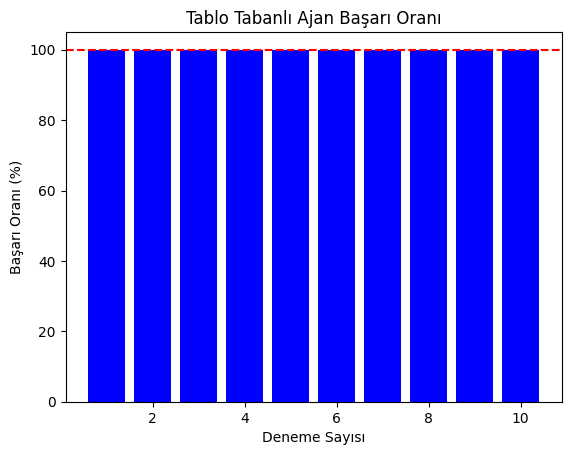

Çevresel Özellikler: {'Gözlenebilirlik': 'Kısmi Gözlenebilir', 'Deterministik': 'Stokastik', 'Epizodik': 'Epizodik', 'Dinamik': 'Statik', 'Kesikli': 'Kesikli', 'Ajan': 'Tekli-ajan'}


In [2]:
import random
import matplotlib.pyplot as plt

class ElektrikSupurgesiOrtam:
    def __init__(self):
        self.konumlar = {
            "A": random.choice(["Temiz", "Kirli"]),
            "B": random.choice(["Temiz", "Kirli"])
        }
        self.ajan_konum = random.choice(["A", "B"])

    def temiz_mi(self):
        return self.konumlar["A"] == "Temiz" and self.konumlar["B"] == "Temiz"

    def sola_git(self):
        self.ajan_konum = "A"

    def saga_git(self):
        self.ajan_konum = "B"

    def supur(self):
        self.konumlar[self.ajan_konum] = "Temiz"

    def eylemi_gerceklestir(self, eylem):
        if eylem == "sola":
            self.sola_git()
        elif eylem == "sağa":
            self.saga_git()
        elif eylem == "süpür":
            self.supur()

class TabloTabanliAjan:
    def __init__(self, ortam):
        self.env = ortam
        self.successful_cleanings = 0
        self.eylem_tablosu = {
            "Kirli_A": "süpür",
            "Kirli_B": "süpür",
            "Temiz_A": "sağa",  # Temiz A ise sağa git
            "Temiz_B": "sola"    # Temiz B ise sola git
        }

    def act(self):
        durum = f"{self.env.konumlar[self.env.ajan_konum]}_{self.env.ajan_konum}"
        eylem = self.eylem_tablosu.get(durum, "bekle")
        
        self.env.eylemi_gerceklestir(eylem)
        
        if self.env.konumlar[self.env.ajan_konum] == "Temiz" and eylem == "süpür":
            self.successful_cleanings += 1

def simulate_tablo_tabanli_ajan(deneme_sayisi=10):
    basari_oranlari = []
    
    for deneme in range(deneme_sayisi):
        ortam = ElektrikSupurgesiOrtam()
        ajan_instance = TabloTabanliAjan(ortam)
        
        for _ in range(10):  # 10 adım
            ajan_instance.act()
        
        # Başarı oranını her deneme için kontrol et
        if ortam.temiz_mi():
            success_rate = 100  # Başarı oranı %100
        else:
            success_rate = 0  # Başarı oranı %0
            
        basari_oranlari.append(success_rate)
        
        # Her denemeden sonra çıktı ver
        print(f"Deneme {deneme + 1}: Başarı Oranı: %{success_rate:.2f}")
    
    genel_basari_orani = sum(basari_oranlari) / deneme_sayisi
    print(f"Genel Başarı Oranı: %{genel_basari_orani:.2f}")
    
    # Görselleştirme
    plt.bar(range(1, deneme_sayisi + 1), basari_oranlari, color='blue')
    plt.xlabel('Deneme Sayısı')
    plt.ylabel('Başarı Oranı (%)')
    plt.title('Tablo Tabanlı Ajan Başarı Oranı')
    plt.axhline(y=genel_basari_orani, color='red', linestyle='--')
    plt.show()

    # Çevresel Özellikler
    cevresel_ozellikler = {
        "Gözlenebilirlik": "Kısmi Gözlenebilir",
        "Deterministik": "Stokastik",
        "Epizodik": "Epizodik",
        "Dinamik": "Statik",
        "Kesikli": "Kesikli",
        "Ajan": "Tekli-ajan"
    }
    
    print("Çevresel Özellikler:", cevresel_ozellikler)

if __name__ == "__main__":
    simulate_tablo_tabanli_ajan()
